<br>
<center>

# Assignments for Week 7

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 550 <br>
4/25/2024  

</div>


## Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, chi2

## Part 1: PCA and Variance Threshold in a Linear Regression
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

## Import the housing data as a data frame and ensure that the data is loaded properly.

In [5]:
path = r'C:\Users\Owner\OneDrive\Desktop\DataScience\2024_Spring_DataMining\train.csv'
data = pd.read_csv(path)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Drop the "Id" column and any features that are missing more than 40% of their values.

In [7]:
data.drop(columns=['Id'], inplace=True) # Drop column

criteria = len(data) * 0.4 # Set criteria

data.dropna(thresh=criteria, axis=1, inplace=True) # drop where criteria is not met

## For numerical columns, fill in any missing data with the median value.

In [9]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns # Locate numerical columns

data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median()) # Fill wth median

## For categorical columns, fill in any missing data with the most common value (mode).

In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns # Locate categorical columns

for col in categorical_columns: # Itterate over the columns and fill with the most common repsonse
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

## Convert the categorical columns to dummy variables.

In [12]:
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True) # Create boolean columns

## Split the data into a training and test set, where the SalePrice column is the target.

In [14]:
X = data.drop(columns=['SalePrice']) # All other columns
y = data['SalePrice'] # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splin into test and training

print("Training:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Training set shape: (1168, 235) (1168,)
Test set shape: (292, 235) (292,)


## Run a linear regression and report the R2-value and RMSE on the test set.

In [16]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train) # Plug n chug

y_pred = linear_reg.predict(X_test) # predictions

r2 = r2_score(y_test, y_pred) # How well did it predict

rmse = mean_squared_error(y_test, y_pred, squared=False) # RMSE

print("R2:", r2)
print("RMSE:", rmse)

R2-value: 0.6434086516194634
RMSE: 52298.871543652116


## Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [18]:
pca = PCA(n_components=0.90) # 90% criteria

X_train_pca = pca.fit_transform(X_train) # Fit and transform

X_test_pca = pca.transform(X_test)# Transform the test features using the same PCA

## How many features are in the PCA-transformed matrix?

In [22]:
num_features_pca = X_train_pca.shape[1]

print("Number of features:", num_features_pca)

Number of features in the PCA-transformed matrix: 1


## Transform but DO NOT fit the test features with the same PCA.

In [23]:
X_test_pca = pca.transform(X_test)

## Repeat step 7 with your PCA transformed data.

In [24]:
linear_regression_pca = LinearRegression()# Train a linear regression model
linear_regression_pca.fit(X_train_pca, y_train)

y_pred_pca = linear_regression_pca.predict(X_test_pca) # Predict

r2_pca = r2_score(y_test, y_pred_pca) # R2

rmse_pca = mean_squared_error(y_test, y_pred_pca, squared=False) # RMSE

print("R2-value on test set (with PCA):", r2_pca)
print("RMSE on test set (with PCA):", rmse_pca)

R2-value on test set (with PCA): 0.06348978217577883
RMSE on test set (with PCA): 84754.5802129634


## Take your original training features (from step 6) and apply a min-max scaler to them.

In [26]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) # Fit and transform 

X_test_scaled = scaler.transform(X_test) # Do not fit again

## Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [28]:
variance = np.var(X_train_scaled, axis=0) # variance

selected_features = X_train_scaled[:, variance > 0.1]# Filter features with variance above .1

print(selected_features)

[[0.11666667 1.         1.         ... 0.         1.         1.        ]
 [0.73333333 0.75       1.         ... 0.         1.         1.        ]
 [0.         0.5        1.         ... 1.         1.         1.        ]
 ...
 [0.66666667 0.         1.         ... 1.         1.         1.        ]
 [0.8        0.25       1.         ... 1.         1.         1.        ]
 [0.95       0.75       1.         ... 0.         1.         1.        ]]


## Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [29]:
X_test_scaled = scaler.transform(X_test)# Min-max scale

X_test_selected = X_test_scaled[:, variance > 0.1]# Feature selection 

print(X_test_selected)

[[0.88333333 0.         1.         ... 0.         1.         1.        ]
 [0.75       1.         1.         ... 0.         1.         1.        ]
 [0.         1.         0.         ... 1.         1.         1.        ]
 ...
 [0.91666667 0.5        1.         ... 0.         1.         1.        ]
 [0.         0.75       1.         ... 1.         1.         1.        ]
 [0.33333333 0.75       1.         ... 1.         1.         1.        ]]


## Repeat step 7 with the high variance data.

In [32]:
# high variance features
high_variance_features = X_train_scaled.var(axis=0) > 0.1
X_train_high_variance = X_train_scaled[:, high_variance_features]

X_test_high_variance = X_test_scaled[:, high_variance_features] # corresponding test set

linear_reg_high_variance = LinearRegression()

linear_reg_high_variance.fit(X_train_high_variance, y_train) # Fit

y_pred_high_variance = linear_reg_high_variance.predict(X_test_high_variance)# Predict

r2_high_variance = r2_score(y_test, y_pred_high_variance)
rmse_high_variance = mean_squared_error(y_test, y_pred_high_variance, squared=False)

print("R2 high variance features:", r2_high_variance)
print("RMSE high variance features:", rmse_high_variance)

R2 score on test set with high variance features: 0.6556489506346084
RMSE on test set with high variance features: 51393.43224984833


## Summarize your findings.

We got a R2 of around .66. Which says the model explains about 65% of the variance in the target variable.
RMSE around 51393 with is the average deviation.

These point to a reasonable model when it come to predicting home prices. Could be better though.

## Part 2: Categorical Feature Selection
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

## Import the data as a data frame and ensure it is loaded correctly.

In [33]:
path = r'C:\Users\Owner\OneDrive\Desktop\DataScience\2024_Spring_DataMining\mushrooms.csv'
data = pd.read_csv(path)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Convert the categorical features (all of them) to dummy variables.

In [35]:
dummy_data = pd.get_dummies(data) # boolean columns

In [40]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: bool(119)
memory usage: 944.2 KB


In [38]:
print(dummy_data.columns)

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=119)


## Split the data into a training and test set.

In [41]:
X = dummy_data.drop(columns=['class_e']) # Features
y = dummy_data['class_e'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train 20% test

## Fit a decision tree classifier on the training set.

In [43]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train) # Fit the classifier to the training data

DecisionTreeClassifier()

## Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [45]:
y_pred = decision_tree_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[782   0]
 [  0 843]]


## Create a visualization of the decision tree.

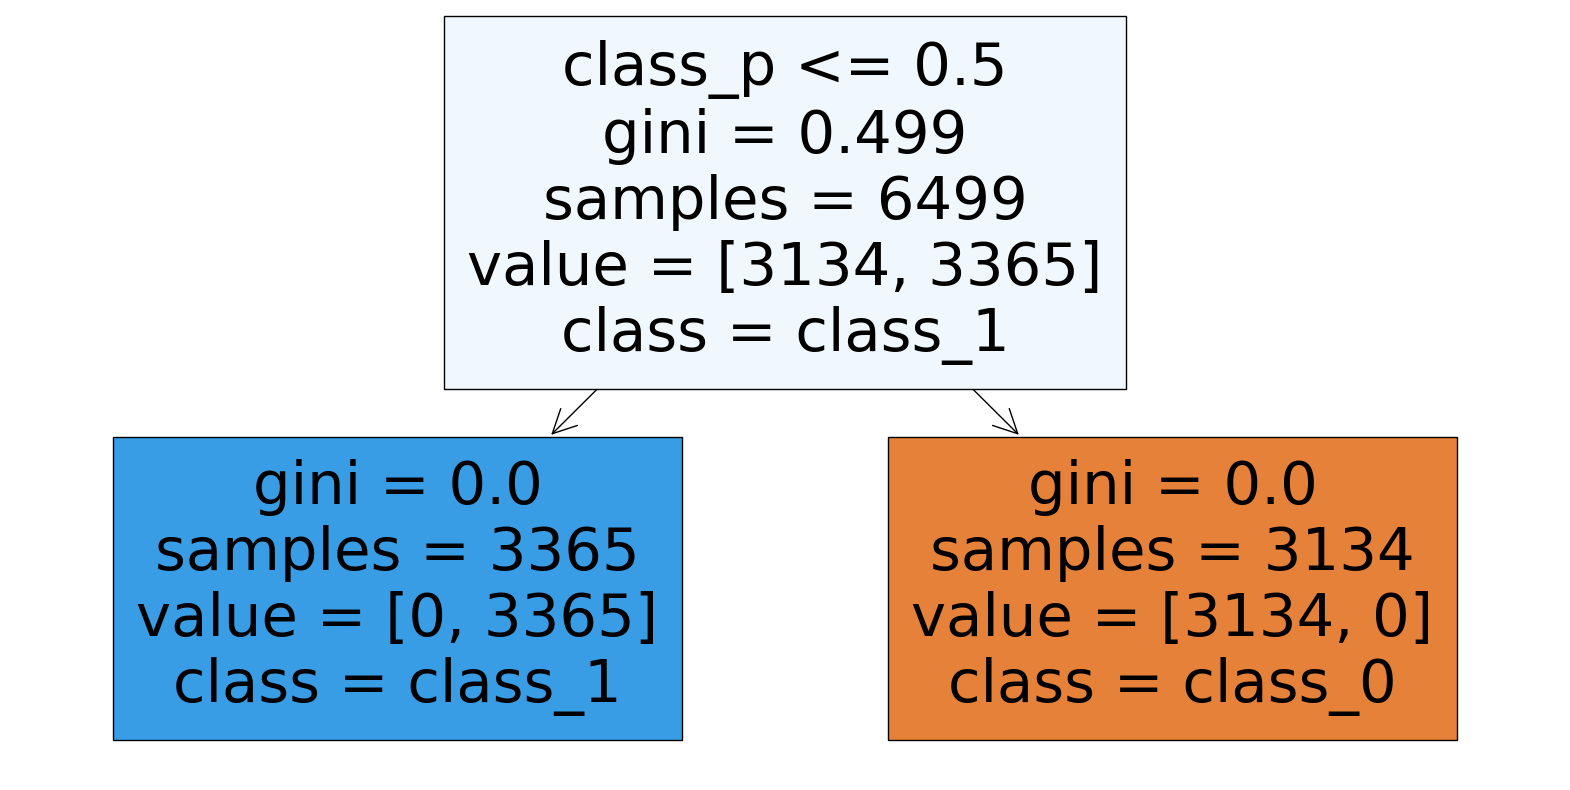

In [48]:
feature_names = X.columns.tolist()

# Plot
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=feature_names, class_names=['class_0', 'class_1'])  
plt.show()

## Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [50]:
k = 5
 
selector = SelectKBest(score_func=chi2, k=k)

X_selected = selector.fit_transform(X, y) # Fit

selected_feature_indices = selector.get_support(indices=True) # Get the indices

selected_feature_names = X.columns[selected_feature_indices]

print("Selected features:", selected_feature_names.tolist())

Selected features: ['class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']


## Which five features were selected in step 7? Hint: Use the get_support function.

In [51]:
selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices] # Names 

print("Selected features:", selected_feature_names.tolist())

Selected features: ['class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']


## Repeat steps 4 and 5 with the five best features selected in step 7.

In [52]:
selected_features_df = X[selected_feature_names] # Features

# Split the data 
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=42)

# Fit a decision tree 
decision_tree_classifier_selected = DecisionTreeClassifier()
decision_tree_classifier_selected.fit(X_train_selected, y_train)

# Accuracy
y_pred_selected = decision_tree_classifier_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
confusion_matrix_selected = confusion_matrix(y_test, y_pred_selected)

print("Accuracy:", accuracy_selected)
print("Confusion Matrix:")
print(confusion_matrix_selected)

Accuracy: 1.0
Confusion Matrix:
[[782   0]
 [  0 843]]


## Summarize your findings.

Looks like this model predicted 100 % of the test set. The confusion matrix shows the same, no false positives or false negatives. The features 'class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k' seem to have all thats needed to determine a mushrooms species.